In [3]:
import pandas as pd

product = pd.read_csv("/content/products_large.csv")
rating = pd.read_csv("/content/ratings_large.csv")
users = pd.read_csv("/content/Updated_Users_Dataset_with_Demographics.csv")


In [4]:
print("product")
display(product.head())
print("rating")
display(rating.head())
print("users")
display(users.head())

product


,product_id,name,category,price
0,P00001,Mean Thing,Books,198.70
1,P00002,End Item,Electronics,603.38
2,P00003,According Thing,Fashion,748.83
3,P00004,Government Gadget,Fashion,145.14
4,P00005,Work Gear,Fashion,79.11


rating


,user_id,product_id,rating,timestamp
0,U0085,P00406,2,2025-01-29T11:29:21
1,U0019,P00055,4,2025-01-05T09:41:31
2,U0045,P00065,4,2025-01-09T18:28:30
3,U0040,P00250,2,2025-04-14T10:11:50
4,U0084,P00120,5,2025-04-02T19:41:33


users


,user_id,name,email,location,age,gender,interests
0,U0001,Melissa Reynolds,fmyers@lopez.net,New Toddview,38,Other,Books
1,U0002,Kelly Dalton,caleb40@gmail.com,Williamsshire,21,Other,Home Decor
2,U0003,Katie Garza,perezchristopher@kelly-williams.com,Christopherfort,18,Male,Gadgets
3,U0004,Alex Lyons,owensjames@hotmail.com,North Jessehaven,41,Other,Beauty
4,U0005,Peter Jones,kblankenship@yahoo.com,Pollardport,26,Other,Home Decor


In [5]:
product.isnull().sum()
users.isnull().sum()
rating.isnull().sum()

,0
user_id,0
product_id,0
rating,0
timestamp,0


In [6]:
ratingtable = rating.groupby(["user_id", "product_id"]).rating.mean().reset_index()    #reset_index se ye U0001 har kisi k saath aayega

ratingtable

,user_id,product_id,rating
0,U0001,P00015,2.0
1,U0001,P00028,4.5
2,U0001,P00040,4.0
3,U0001,P00055,4.0
4,U0001,P00061,1.0
...,...,...,...
4758,U0100,P00471,4.0
4759,U0100,P00477,2.0
4760,U0100,P00487,1.0
4761,U0100,P00497,2.0


In [7]:
main_matrix = ratingtable.pivot(index= "user_id",columns="product_id", values= "rating").fillna(0)
main_matrix

product_id,P00001,P00002,P00003,P00004,P00005,P00006,P00007,P00008,P00009,P00010,...,P00491,P00492,P00493,P00494,P00495,P00496,P00497,P00498,P00499,P00500
user_id,,,,,,,,,,,,,,,,,,,,,
U0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
U0002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0
U0003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
U0004,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
U0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U0096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U0097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U0098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
main_similarity = cosine_similarity(main_matrix)

main_similarity

array([[1.        , 0.13433735, 0.06654083, ..., 0.05898849, 0.04233581,
        0.12692226],
       [0.13433735, 1.        , 0.07248326, ..., 0.08302694, 0.10960179,
        0.05939211],
       [0.06654083, 0.07248326, 1.        , ..., 0.11088031, 0.04034567,
        0.06371477],
       ...,
       [0.05898849, 0.08302694, 0.11088031, ..., 1.        , 0.04890139,
        0.12929266],
       [0.04233581, 0.10960179, 0.04034567, ..., 0.04890139, 1.        ,
        0.16033551],
       [0.12692226, 0.05939211, 0.06371477, ..., 0.12929266, 0.16033551,
        1.        ]])

In [10]:
#Transpose of our main+matrix-----means user, product and rating
transpose_main_matrix = main_matrix.T
transpose_main_matrix

user_id,U0001,U0002,U0003,U0004,U0005,U0006,U0007,U0008,U0009,U0010,...,U0091,U0092,U0093,U0094,U0095,U0096,U0097,U0098,U0099,U0100
product_id,,,,,,,,,,,,,,,,,,,,,
P00001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P00002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P00003,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P00004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P00005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P00496,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P00497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
P00498,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
transpose_similarity = cosine_similarity(transpose_main_matrix)
transpose_similarity

array([[1.        , 0.        , 0.11927604, ..., 0.16048217, 0.14143579,
        0.        ],
       [0.        , 1.        , 0.08349323, ..., 0.        , 0.20205113,
        0.        ],
       [0.11927604, 0.08349323, 1.        , ..., 0.33976479, 0.1368872 ,
        0.31156172],
       ...,
       [0.16048217, 0.        , 0.33976479, ..., 1.        , 0.12949975,
        0.        ],
       [0.14143579, 0.20205113, 0.1368872 , ..., 0.12949975, 1.        ,
        0.11917591],
       [0.        , 0.        , 0.31156172, ..., 0.        , 0.11917591,
        1.        ]])

In [12]:
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt
main_matrix.index

main_lst = main_matrix.index.to_list()
main_lst
top = 20   #variiable

In [14]:
main_matrix_top = main_matrix.iloc[:top, :top]
main_lst_top = main_lst[:top]
main_lst_top

['U0001',
 'U0002',
 'U0003',
 'U0004',
 'U0005',
 'U0006',
 'U0007',
 'U0008',
 'U0009',
 'U0010',
 'U0011',
 'U0012',
 'U0013',
 'U0014',
 'U0015',
 'U0016',
 'U0017',
 'U0018',
 'U0019',
 'U0020']

In [15]:
transpose_top = transpose_main_matrix.iloc[:top, :top]

transpose_lst = transpose_main_matrix.index.to_list()
transpose_lst_top = transpose_lst[:top]
transpose_lst_top


['P00001',
 'P00002',
 'P00003',
 'P00004',
 'P00005',
 'P00006',
 'P00007',
 'P00008',
 'P00009',
 'P00010',
 'P00011',
 'P00012',
 'P00013',
 'P00014',
 'P00015',
 'P00016',
 'P00017',
 'P00018',
 'P00019',
 'P00020']

Text(95.72222222222221, 0.5, 'Users')

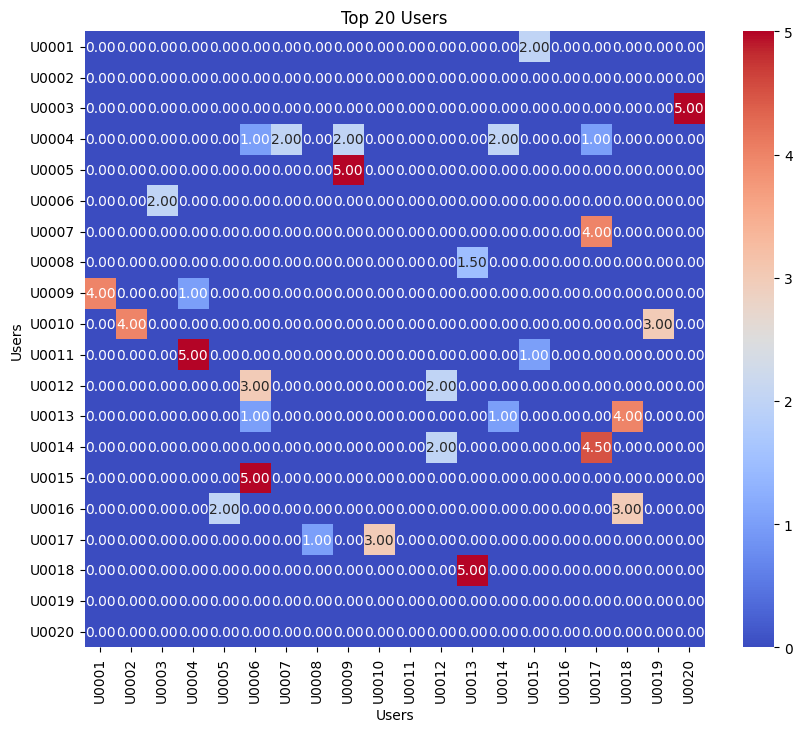

In [16]:
#user-user
plt.figure(figsize=(10,8))
sns.heatmap(main_matrix_top, xticklabels=main_lst_top, yticklabels=main_lst_top, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Top 20 Users")
plt.xlabel("Users")
plt.ylabel("Users")


Text(95.72222222222221, 0.5, 'Products')

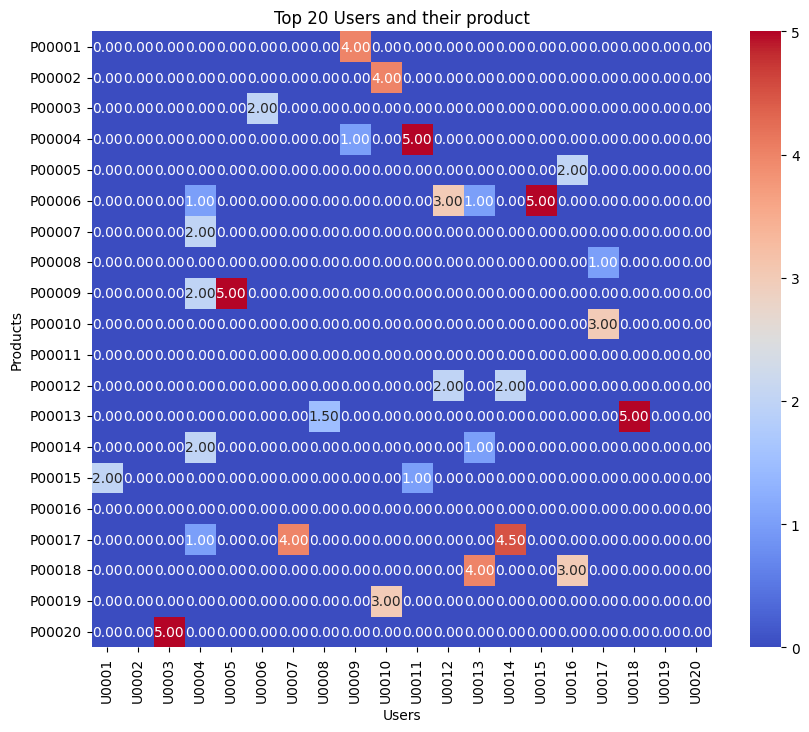

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(transpose_top, xticklabels=main_lst_top, yticklabels=transpose_lst_top, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Top 20 Users and their product")
plt.xlabel("Users")
plt.ylabel("Products")

In [18]:
#user_index = main_matrix.index.get_loc("U0001")    #for indexing
#ser_index

In [19]:
import pandas as pd
import numpy as np

def recommend_user(user_id, top_n = 5):
  if(user_id not in main_matrix.index):
      print("This user_id is not in our matrix")
      return pd.Dataframe
  user_index = main_matrix.index.get_loc(user_id)
  similar_user = main_similarity[user_index]
  similar_product = similar_user @ main_matrix.values     #dot product

  valid_rating = main_matrix.loc[user_id].values > 0

  similar_product[valid_rating] = -np.inf     #true valo ko hi -infinity karenge kyuki hame recomend unko hi karna h jo false hai means phele se koi movie nahi dekhi......
  #Sort_users = similar_product.sort_values(ascending=False).head(top_n)
  Sort_users = np.argsort(similar_product)[::-1][:top_n]
  apna_product = main_matrix.columns[Sort_users]
  print(f"Top users ids{user_id} : {list(apna_product)}")

  recommends = product[product['product_id'].isin(apna_product)]

  print(recommends[["product_id", "name", "price"]])









In [20]:
recommend_user("U0001", top_n = 5)

Top users idsU0001 : ['P00395', 'P00351', 'P00322', 'P00475', 'P00410']
    product_id          name   price
321     P00322    More Thing  512.34
350     P00351   Fall Device  100.84
394     P00395  Seven Device  744.62
409     P00410       To Item  368.23
474     P00475    Third Gear  839.00


In [21]:
def recommend_product_based_on_product(product_id, top_n=20):
  if product_id not in transpose_main_matrix.index:
    print("No such product found in our matrix")
    return pd.DataFrame

  product_index = transpose_main_matrix.index.get_loc(product_id)
  our_similar_product = transpose_similarity[product_index]
  dot_product_recommend = our_similar_product @ transpose_main_matrix.values
  valid_rating_product = transpose_main_matrix.loc[product_id] > 0
  dot_product_recommend[valid_rating_product] = -np.inf

  top_similar_index_product = np.argsort(dot_product_recommend )[::-1][:top_n]
  #top_similar_index_product = np.argsort(our_similar_product)[::-1][:top_n]


  recommend_product_ids = transpose_main_matrix.index[top_similar_index_product]

  print(f"Top similar products to {product_id}: {list(recommend_product_ids)}")

  recommends = product[product['product_id'].isin(recommend_product_ids)]

  print(recommends[["product_id", "name", "price"]])



In [22]:
recommend_product_based_on_product("P00040", top_n=20)

Top similar products to P00040: ['P00029', 'P00079', 'P00034', 'P00018', 'P00062', 'P00083', 'P00087', 'P00041', 'P00088', 'P00047', 'P00082', 'P00076', 'P00044', 'P00031', 'P00006', 'P00050', 'P00074', 'P00056', 'P00099', 'P00036']
   product_id             name   price
5      P00006       Blood Item  774.95
17     P00018      Drop Gadget  489.50
28     P00029  Attorney Device  324.99
30     P00031      North Thing  914.30
33     P00034         Sit Gear  794.47
35     P00036     Become Thing  160.58
40     P00041       Drop Thing  109.36
43     P00044        Area Gear  911.34
46     P00047        By Gadget  872.22
49     P00050       Above Item  783.71
55     P00056         Lay Gear  677.61
61     P00062   Teacher Gadget  545.61
73     P00074  Successful Item  306.47
75     P00076  Magazine Gadget  331.13
78     P00079      Always Gear  436.38
81     P00082     Decide Thing  684.98
82     P00083      Detail Item  188.26
86     P00087      Affect Gear  686.30
87     P00088     Family T

In [24]:
#User_product.......
import pickle
with open("user_similiarity.pkl", "wb") as f:
  pickle.dump(main_similarity, f)

with open("item_similarity.pkl", "wb") as b:
  pickle.dump(transpose_similarity, b)
